In [3]:
import os
import sys
import numpy as np
PROJECT_PATH = os.path.abspath(
    os.path.join(os.path.dirname('__file__'), '..'))
sys.path.append(PROJECT_PATH)

from parameters import loader_keys
from modules.data_loaders.ztf_small_outlier_loader import ZTFSmallOutlierLoader
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
def _save_histogram(self, score_metric_dict, score_name, dataset_name,
    class_name, save_folder_path=None):
  if save_folder_path is None:
    return
  # TODO: refactor usage of percentile, include it in metrics and
  #  get it from key
  # percentile = 95.46
  scores_val = score_metric_dict['scores_val']
  auc_roc = score_metric_dict['roc_auc']
  accuracies = score_metric_dict['accuracies']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  thresholds = score_metric_dict['roc_thresholds']
  accuracy_at_percentile = score_metric_dict['acc_at_percentil']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  min_score = np.min(scores)
  max_score = np.max(scores)
  thr_percentile = np.percentile(scores_val, 100 - self.percentile)
  fig = plt.figure(figsize=(8, 6))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUC_ROC: %.2f%%, BEST ACC: %.2f%%' % (
        auc_roc * 100, np.max(accuracies) * 100))
  ax_acc = ax_hist.twinx()
  hist1 = ax_hist.hist(inliers_scores, 300, alpha=0.5,
                       label='inlier', range=[min_score, max_score])
  hist2 = ax_hist.hist(outliers_scores, 300, alpha=0.5,
                       label='outlier', range=[min_score, max_score])
  ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  ax_hist.set_ylabel('Counts', fontsize=12)
  ax_hist.set_xlabel(score_name, fontsize=12)
  # acc plot
  ax_acc.set_ylim([0.5, 1.0])
  ax_acc.yaxis.set_ticks(np.arange(0.5, 1.05, 0.05))
  ax_acc.set_ylabel('Accuracy', fontsize=12)
  acc_plot = ax_acc.plot(thresholds, accuracies, lw=2,
                         label='Accuracy by\nthresholds',
                         color='black')
  percentil_plot = ax_hist.plot([thr_percentile, thr_percentile], [0, max_],
                                'k--',
                                label='thr percentil %i on %s' % (
                                  self.percentile, dataset_name))
  ax_hist.text(thr_percentile,
               max_ * 0.6,
               'Acc: {:.2f}%'.format(accuracy_at_percentile * 100))
  ax_acc.grid(ls='--')
  fig.legend(loc="upper right", bbox_to_anchor=(1, 1),
             bbox_transform=ax_hist.transAxes)
  results_name = self._get_score_result_name(score_name, dataset_name,
                                             class_name)
  fig.savefig(
      os.path.join(save_folder_path, '%s_hist_thr_acc.png' % results_name),
      bbox_inches='tight')
  plt.close()


In [7]:
data_path = os.path.join(
    PROJECT_PATH, 'figure_creation','aux',
    'small-ztf-PlusKernel-Transformer-after-selection-29_Transformer-OD-Model-dirichlet_real_20200131-163906.npz')
data_dict = dict(np.load(data_path))



In [13]:
def save_histogram(score_metric_dict, score_name, dataset_name,
    class_name):

  # TODO: refactor usage of percentile, include it in metrics and
  #  get it from key
  percentile = 95.46
  scores_val = score_metric_dict['scores_val']
  auc_roc = score_metric_dict['roc_auc']
  accuracies = score_metric_dict['accuracies']
  scores = score_metric_dict['scores']
  labels = score_metric_dict['labels']
  thresholds = score_metric_dict['roc_thresholds']
  accuracy_at_percentile = score_metric_dict['acc_at_percentil']
  inliers_scores = scores[labels == 1]
  outliers_scores = scores[labels != 1]
  min_score = np.min(scores)
  max_score = np.max(scores)
  thr_percentile = np.percentile(scores_val, 100 - percentile)
  fig = plt.figure(figsize=(8, 6))
  ax_hist = fig.add_subplot(111)
  ax_hist.set_title(
      'AUC_ROC: %.2f%%, BEST ACC: %.2f%%' % (
        auc_roc * 100, np.max(accuracies) * 100))
  ax_acc = ax_hist.twinx()
  hist1 = ax_hist.hist(inliers_scores, 300, alpha=0.5,
                       label='inlier', range=[min_score, max_score])
  hist2 = ax_hist.hist(outliers_scores, 300, alpha=0.5,
                       label='outlier', range=[min_score, max_score])
  ax_hist.set_yscale('log')
  _, max_ = ax_hist.set_ylim()
  ax_hist.set_ylabel('Counts', fontsize=12)
  ax_hist.set_xlabel(score_name, fontsize=12)
  # acc plot
  ax_acc.set_ylim([0.5, 1.0])
  ax_acc.yaxis.set_ticks(np.arange(0.5, 1.05, 0.05))
  ax_acc.set_ylabel('Accuracy', fontsize=12)
  acc_plot = ax_acc.plot(thresholds, accuracies, lw=2,
                         label='Accuracy by\nthresholds',
                         color='black')
  percentil_plot = ax_hist.plot([thr_percentile, thr_percentile], [0, max_],
                                'k--',
                                label='thr percentil %i on %s' % (
                                  percentile, dataset_name))
  ax_hist.text(thr_percentile,
               max_ * 0.6,
               'Acc: {:.2f}%'.format(accuracy_at_percentile * 100))
  ax_acc.grid(ls='--')
  fig.legend(loc="upper right", bbox_to_anchor=(1, 1),
             bbox_transform=ax_hist.transAxes)

  # fig.savefig(
  #     os.path.join(save_folder_path, '%s_hist_thr_acc.png' % results_name),
  #     bbox_inches='tight')
  plt.show()

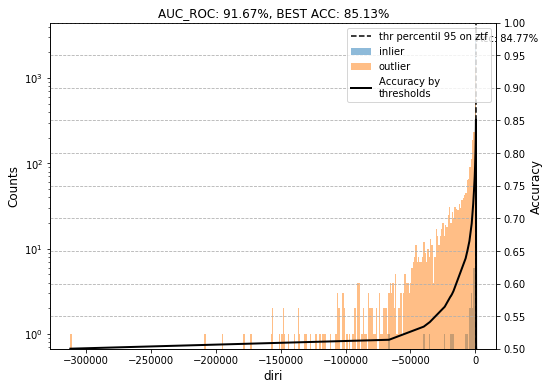

In [14]:
save_histogram(data_dict, 'diri', 'ztf', 'bogus')